To develop a predictive model that determines the likelihood of a person experiencing a heart attack based on a dataset containing relevant health features. The aim is to analyze the data, identify significant predictors, and utilize machine learning algorithms to create an accurate and reliable classification model. This model will assist in early detection, risk assessment, and informed medical decision-making to improve patient outcomes

## **Importing** The Neccessary Libraries For Understanding and Visualizing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
## checking null values 
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
## checking duplicates
df[df.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [5]:
## Shape of Dataset 
df.shape

(303, 14)

In [6]:
## removing duplicate value
df.drop_duplicates(inplace=True)

In [7]:
## shape of dataset after removing duplicate
df.shape

(302, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


## All the features dependent and independent are numerical 
## Here we have 13 independent and 1 dependent column (supervised Dataset)


### Understanding Features 

- **age**: Numeric age of the person.
- **sex**: Gender of the person (0 = Female, 1 = Male).
- **cp**: Chest pain type 
  - 0 = Typical angina
  - 1 = Atypical angina
  - 2 = Non-anginal pain
  - 3 = Asymptomatic
- **trtbps**: Resting blood pressure (in mm Hg).
- **chol**: Serum cholesterol level (in mg/dl).
- **fbs**: Fasting blood sugar > 120 mg/dl 
  - 1 = True
  - 0 = False
- **restecg**: Resting electrocardiographic results
  - 0 = Normal
  - 1 = ST-T wave abnormality
  - 2 = Left ventricular hypertrophy
- **thalachh**: Maximum heart rate achieved.
- **exng**: Exercise induced angina
  - 1 = Yes
  - 0 = No
- **oldpeak**: Depression induced by exercise relative to rest.
- **slp**: Slope of the peak exercise ST segment
  - 0 = Upsloping
  - 1 = Flat
  - 2 = Downsloping
- **caa**: Number of major vessels colored by fluoroscopy (0-3).
- **thall**: Thalassemia
  - 3 = Normal
  - 6 = Fixed defect
  - 7 = Reversible defect

In [9]:
## checking the Unique values of cp,restecg,slp and thall features which represent the conditions of disease 
print("Numerical Features cp contains :  " ,end= " ")
print(df.cp.unique())
print()
print("Numerical Features restecg contains :  " ,end= " ")
print(df.restecg.unique())
print()
print("Numerical Features slp contains :  " ,end= " ")
print(df.slp.unique())
print()
print("Numerical Features thall contains :  " ,end= " ")
print(df.thall.unique())
print()

Numerical Features cp contains :   [3 2 1 0]

Numerical Features restecg contains :   [0 1 2]

Numerical Features slp contains :   [0 2 1]

Numerical Features thall contains :   [1 2 3 0]



### Exploratory Data Analysis

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\3222253242.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df , x='age' ,palette ='viridis' , kde=True)


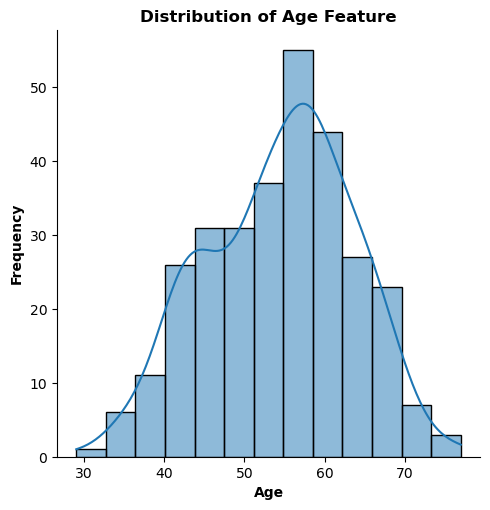

In [10]:
## Checking the Distribution of Age Feature 

sns.displot(data=df , x='age' ,palette ='viridis' , kde=True)
plt.title("Distribution of Age Feature" ,fontweight ="bold" , color='black')
plt.xlabel("Age" , fontweight ="bold" , color='black')
plt.ylabel("Frequency" ,fontweight ="bold" , color='black')
plt.show()

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\3068203943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[0]=sns.countplot(data=df , x='sex' , palette = 'viridis')


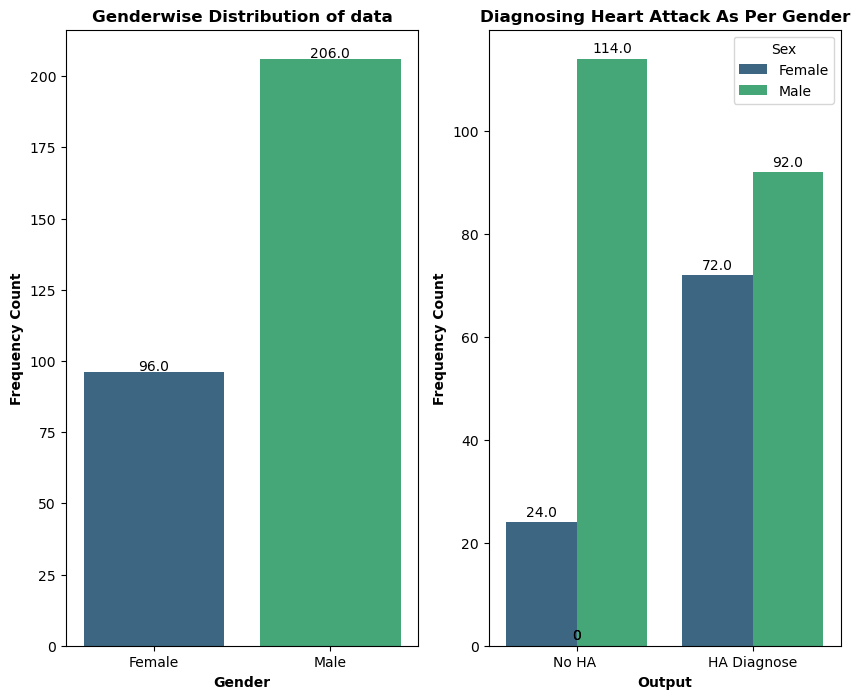

In [11]:
fig,ax = plt.subplots(1,2,figsize=(10,8))
plt.subplot(121)
X = ['Female','Male']
x_axis = np.arange(len(X))
ax[0]=sns.countplot(data=df , x='sex' , palette = 'viridis')
for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)
plt.xticks(x_axis,X)
plt.xlabel('Gender' , fontweight ="bold" , color='black')
plt.ylabel('Frequency Count',fontweight ="bold" , color='black')
plt.title("Genderwise Distribution of data" ,fontweight ="bold" , color='black')
plt.subplot(122)           
ticks = ['No HA ','HA Diagnose']
ticks_axis = np.arange(len(ticks))
ax[1]=sns.countplot(data=df , x='output' ,hue='sex', palette = 'viridis')
for bar in ax[1].patches:
    height = bar.get_height()
    ax[1].text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)
plt.xticks(ticks_axis,ticks)
plt.title("Diagnosing Heart Attack As Per Gender",fontweight ="bold" , color='black')
plt.xlabel("Output",fontweight ="bold" , color='black')
plt.ylabel('Frequency Count',fontweight ="bold" , color='black')
plt.legend(title='Sex' , labels=['Female','Male'])

plt.show()

    

### Insight : The above grapgh shows that men have highier number of population as well as highier numbers of Heart Attack 

In [12]:
copy_df=df.copy()

In [13]:
copy_df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [14]:
bins=[29,40,55,65,77]
labels=["Young Age","Middle Age-Adult","Senior Adult","Elderly"]
copy_df['age_group']=pd.cut(copy_df['age'] , bins=bins,labels=labels)


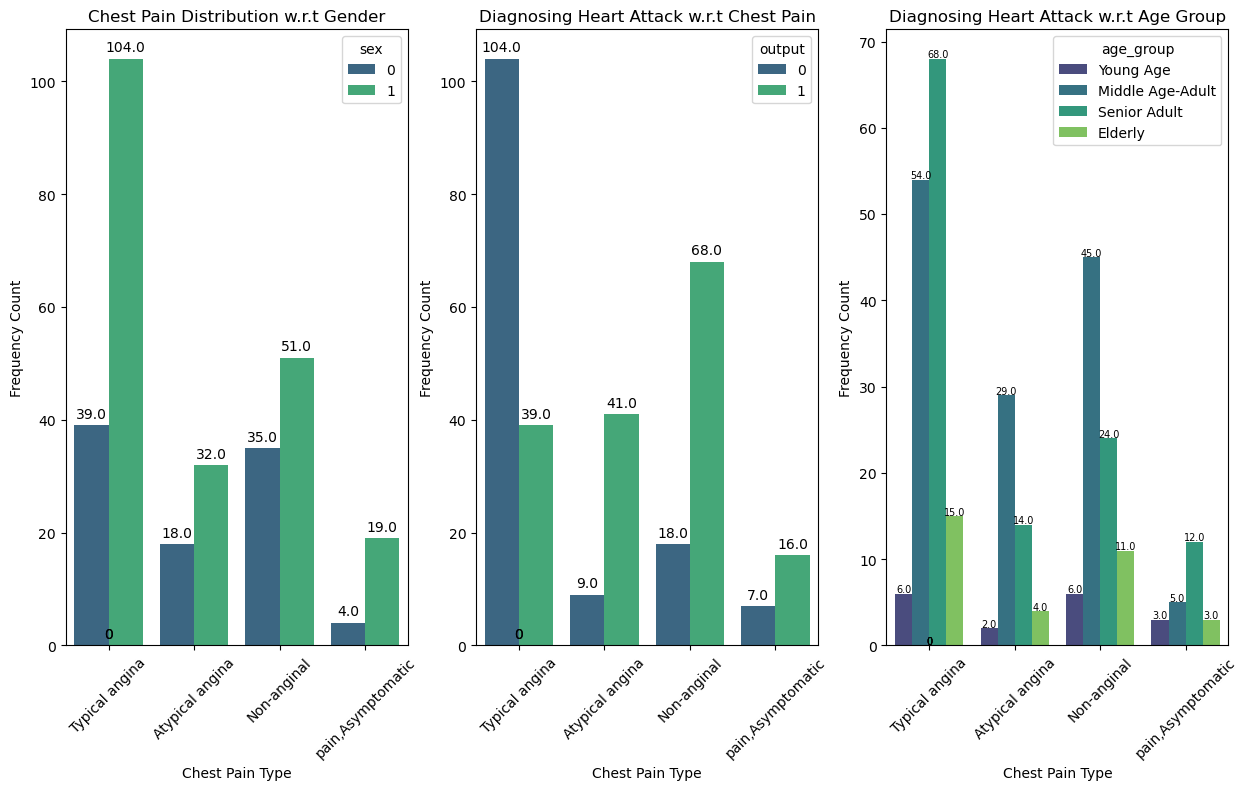

In [15]:
fig,ax=plt.subplots(1,3,figsize=(15,8))
plt.subplot(131)
ticks=['Typical angina','Atypical angina', 'Non-anginal', 'pain,Asymptomatic']
axis=np.arange(len(ticks))
ax[0]=sns.countplot(data=copy_df , x='cp',hue='sex', palette='viridis')
for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)

plt.xticks(axis,ticks,rotation=45)
plt.xlabel("Chest Pain Type")
plt.title("Chest Pain Distribution w.r.t Gender")
plt.ylabel("Frequency Count")
plt.subplot(132)
ax[1]=sns.countplot(data=copy_df , x='cp',hue='output', palette='viridis')
for bar in ax[1].patches:
    height = bar.get_height()
    ax[1].text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)

plt.xticks(axis,ticks,rotation=45)
plt.xlabel("Chest Pain Type")
plt.title("Diagnosing Heart Attack w.r.t Chest Pain")
plt.ylabel("Frequency Count")
plt.subplot(133)
ax[2]=sns.countplot(data=copy_df , x='cp',hue='age_group', palette='viridis')
for bar in ax[2].patches:
    height = bar.get_height()
    ax[2].text(bar.get_x()+bar.get_width()/2,height+0.5,f'{height}',ha='center',va='center',fontsize=7)

plt.xticks(axis,ticks,rotation=45)
plt.xlabel("Chest Pain Type")
plt.title("Diagnosing Heart Attack w.r.t Age Group")
plt.ylabel("Frequency Count")




plt.show()


### Insight : The above graph shows that most numbers of senior adults with Chest Pain of category Typical Angina have more number of heart attacks

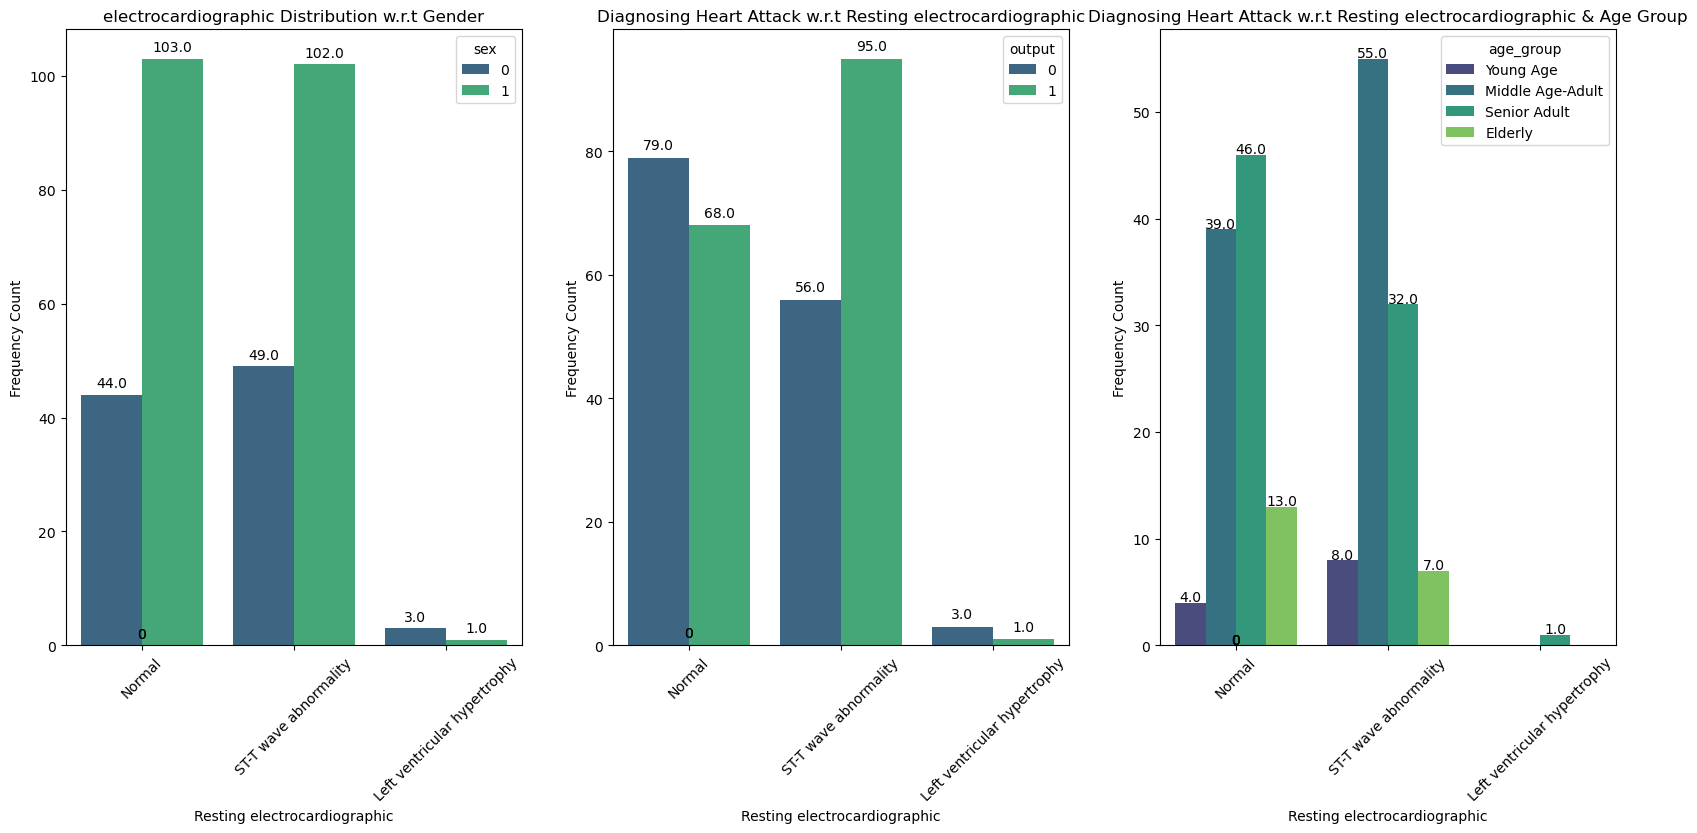

In [16]:
fig,ax=plt.subplots(1,3,figsize=(20,8))
ticks= ['Normal','ST-T wave abnormality','Left ventricular hypertrophy']
axis = np.arange(len(ticks))
plt.subplot(131)
ax[0]=sns.countplot(data=copy_df , x='restecg',hue='sex', palette='viridis')
for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)

plt.xticks(axis,ticks,rotation=45)
plt.xlabel("Resting electrocardiographic")
plt.title("electrocardiographic Distribution w.r.t Gender")
plt.ylabel("Frequency Count")
plt.subplot(132)
ax[1]=sns.countplot(data=copy_df , x='restecg',hue='output', palette='viridis')
for bar in ax[1].patches:
    height = bar.get_height()
    ax[1].text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)

plt.xticks(axis,ticks,rotation=45)
plt.xlabel("Resting electrocardiographic")
plt.title("Diagnosing Heart Attack w.r.t Resting electrocardiographic")
plt.ylabel("Frequency Count")
plt.subplot(133)
ax[2]=sns.countplot(data=copy_df[copy_df['sex']==1] , x='restecg',hue='age_group', palette='viridis')
for bar in ax[2].patches:
    height = bar.get_height()
    ax[2].text(bar.get_x()+bar.get_width()/2,height+0.5,f'{height}',ha='center',va='center',fontsize=10)

plt.xticks(axis,ticks,rotation=45)
plt.xlabel("Resting electrocardiographic")
plt.title("Diagnosing Heart Attack w.r.t Resting electrocardiographic & Age Group")
plt.ylabel("Frequency Count")
plt.show()

### Insight : The above graph shows that the feature Resting Electrocardiographic with category LVH has least number of Heart Attacks

In [17]:
sex_group=copy_df.groupby('sex').mean(numeric_only=True)

In [18]:
sex_group

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125000,0.572917,151.12500,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.834951,0.927184,130.912621,239.601942,0.160194,0.504854,148.84466,0.373786,1.120874,1.383495,0.796117,2.402913,0.446602


In [19]:
#cat_features=['cp','restecg','slp','thall']  
#ticks_dict = {
#    'cp': ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'],
#    'restecg': ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'],
#    'slp': ['Upsloping', 'Flat', 'Downsloping'],
#    'thall': ['Normal', 'Fixed defect', 'Reversible defect'] }

#for i,feature in enumerate(cat_features):
#    plt.figure(figsize=(10,5))
    
#    sns.countplot(data=copy_df,x=feature,palette='viridis')
#    plt.title("Distribution of {feaute}")
#    plt.xticks(ticks=range(len(ticks_dict[feature])), labels=ticks_dict[feature])
#    plt.show()

    
    
#    sns.countplot(data=copy_df,x=feature,hue='output',palette='viridis')
#    plt.title("Distribution of {feature} w.r.t Output")
#    plt.xticks(ticks=range(len(ticks_dict[feature])), labels=ticks_dict[feature])
#    plt.legend(title="Heart Attack" , label=['Low Risk' , 'High Risk'])
#    plt.show()

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\2180231925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=copy_df, x=feature, palette='viridis')


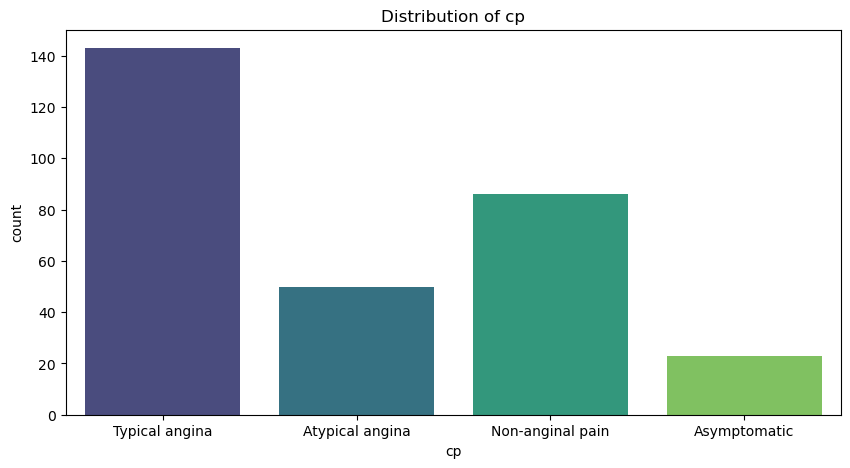

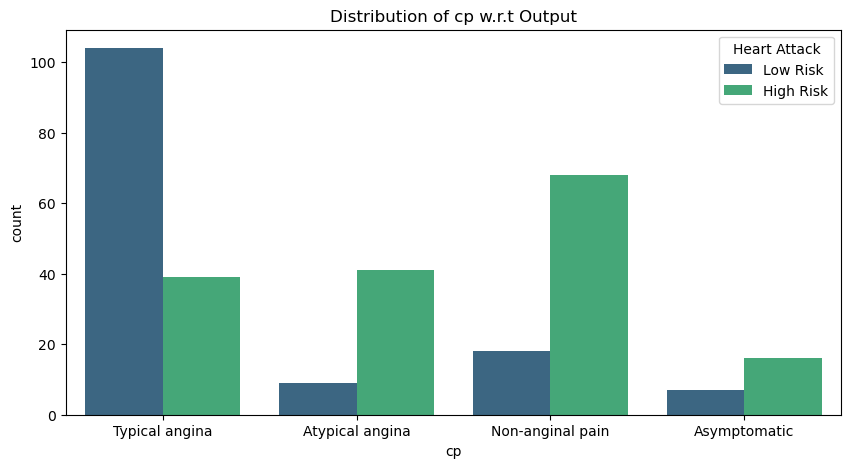

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\2180231925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=copy_df, x=feature, palette='viridis')


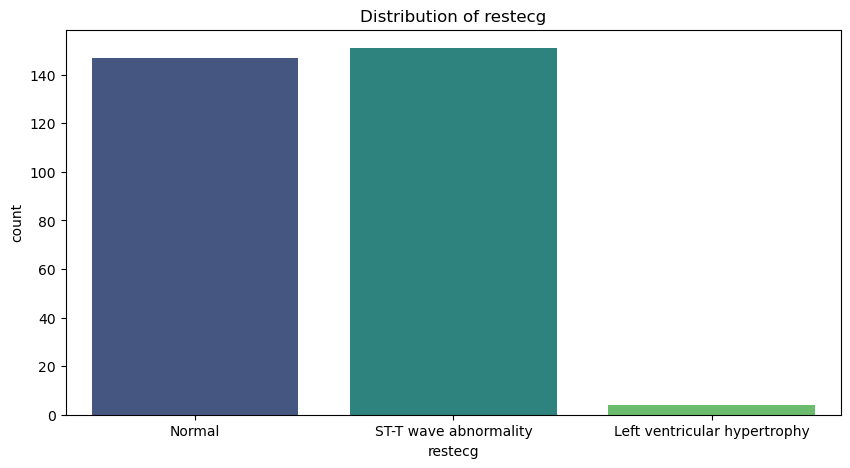

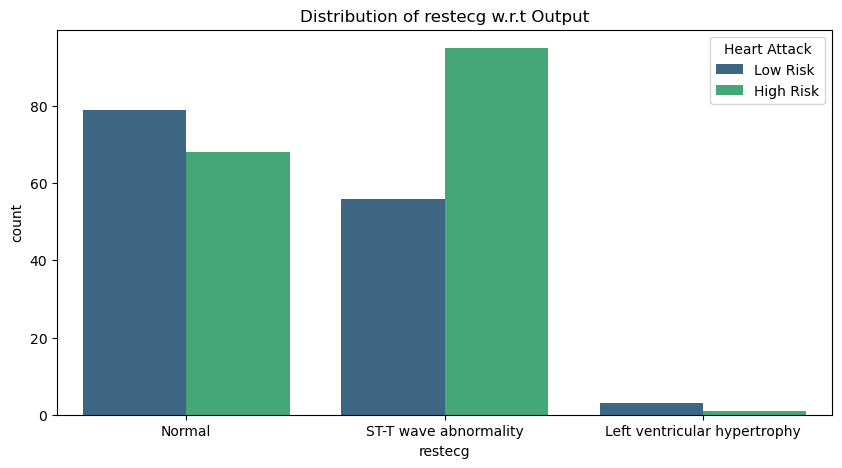

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\2180231925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=copy_df, x=feature, palette='viridis')


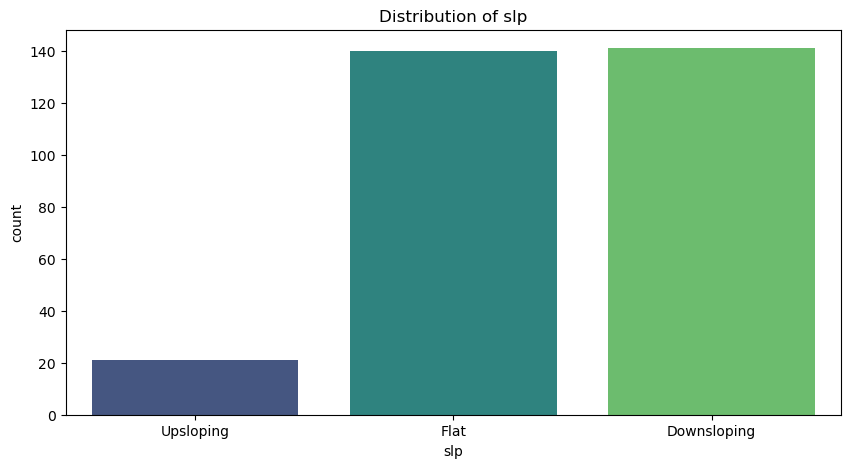

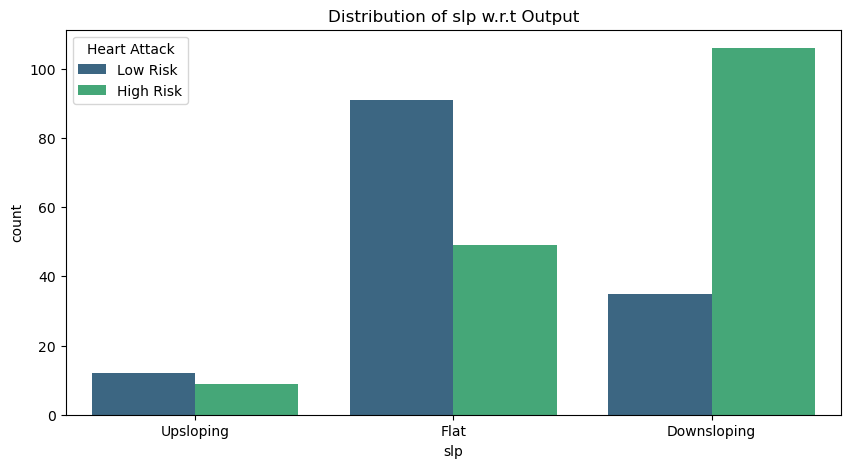

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\2180231925.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=copy_df, x=feature, palette='viridis')


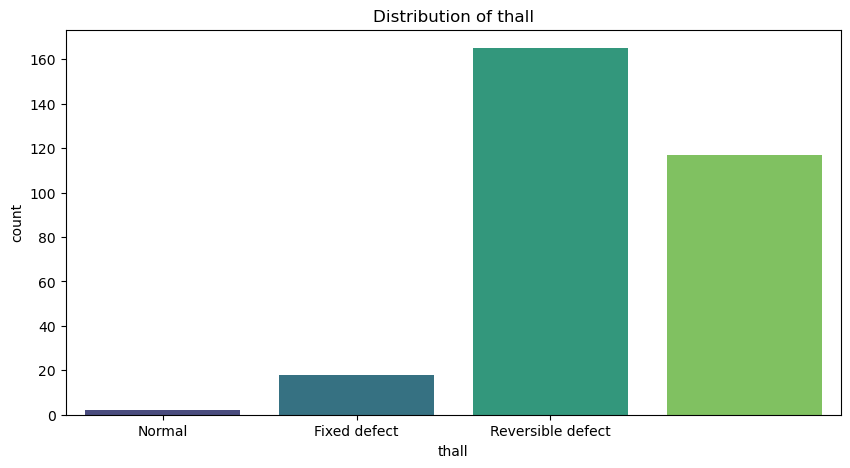

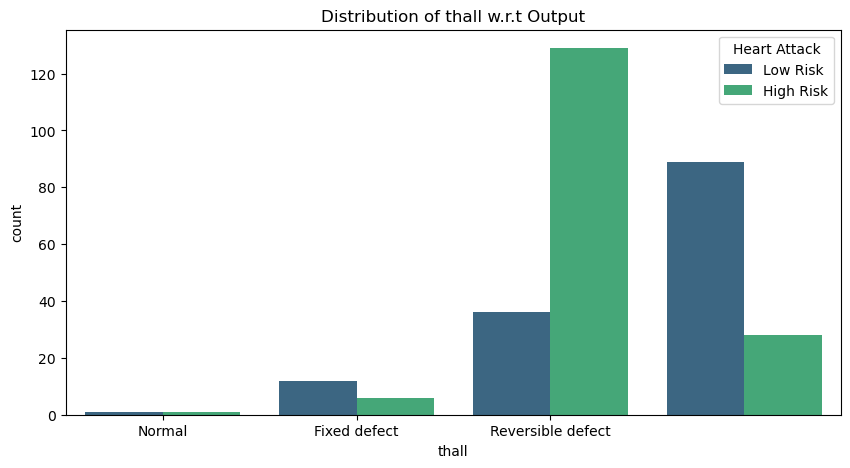

In [20]:
cat_features = ['cp', 'restecg', 'slp', 'thall']  
ticks_dict = {
    'cp': ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'],
    'restecg': ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'],
    'slp': ['Upsloping', 'Flat', 'Downsloping'],
    'thall': ['Normal', 'Fixed defect', 'Reversible defect']
}

for i, feature in enumerate(cat_features):
    plt.figure(figsize=(10,5))

    # First plot without hue
    sns.countplot(data=copy_df, x=feature, palette='viridis')
    plt.title(f"Distribution of {feature}")
    plt.xticks(ticks=range(len(ticks_dict[feature])), labels=ticks_dict[feature])

    plt.show()

    # Second plot with hue='output'
    plt.figure(figsize=(10,5))
    sns.countplot(data=copy_df, x=feature, hue='output', palette='viridis')
    plt.title(f"Distribution of {feature} w.r.t Output")
    plt.xticks(ticks=range(len(ticks_dict[feature])), labels=ticks_dict[feature])
    
    plt.legend(title="Heart Attack", labels=['Low Risk', 'High Risk'])
    plt.show()

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\2900325394.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, i], data=copy_df, x=feature, palette='viridis')
C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\2900325394.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, i], data=copy_df, x=feature, palette='viridis')
C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\2900325394.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, i], data=copy_df, x=feature, palette='viridis')
C:\Users\ACS\AppData\Local\Temp

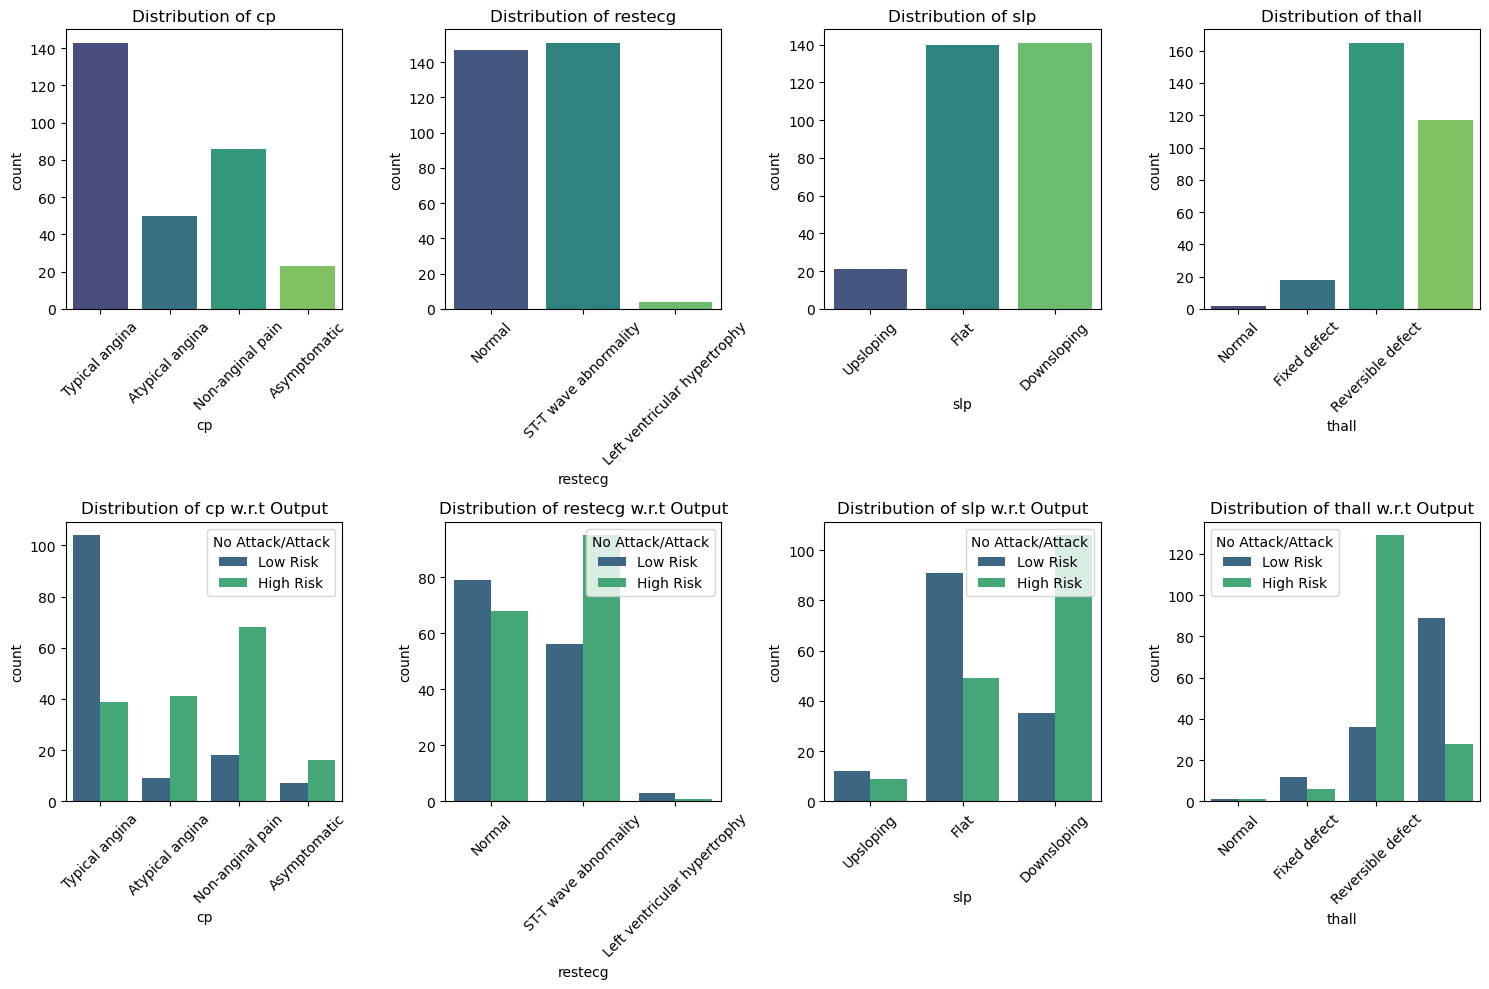

In [21]:
cat_features = ['cp', 'restecg', 'slp', 'thall']  
ticks_dict = {
    'cp': ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'],
    'restecg': ['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'],
    'slp': ['Upsloping', 'Flat', 'Downsloping'],
    'thall': ['Normal', 'Fixed defect', 'Reversible defect']
}
fig, axes = plt.subplots(2, 4, figsize=(15,10))

for i, feature in enumerate(cat_features):
    sns.countplot(ax=axes[0, i], data=copy_df, x=feature, palette='viridis')
    axes[0, i].set_title(f"Distribution of {feature}")
    axes[0, i].set_xticks(range(len(ticks_dict[feature])))
    axes[0, i].set_xticklabels(ticks_dict[feature],rotation=45)
    
    sns.countplot(ax=axes[1, i], data=copy_df, x=feature, hue='output', palette='viridis')
    axes[1, i].set_title(f"Distribution of {feature} w.r.t Output")
    axes[1, i].set_xticks(range(len(ticks_dict[feature])))
    axes[1, i].set_xticklabels(ticks_dict[feature],rotation=45)
    axes[1, i].legend(title="No Attack/Attack", labels=['Low Risk', 'High Risk'])
plt.tight_layout()
plt.show()

C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\256364172.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axs[row,col],data=copy_df , x=feature  ,kde=True,palette = 'cividis')
C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\256364172.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axs[row,col],data=copy_df , x=feature  ,kde=True,palette = 'cividis')
C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\256364172.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axs[row,col],data=copy_df , x=feature  ,kde=True,palette = 'cividis')
C:\Users\ACS\AppData\Local\Temp\ipykernel_5216\256364172.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(ax=axs[row,col],data=copy_df , x=feature  ,kde=True,palette = 'cividis')


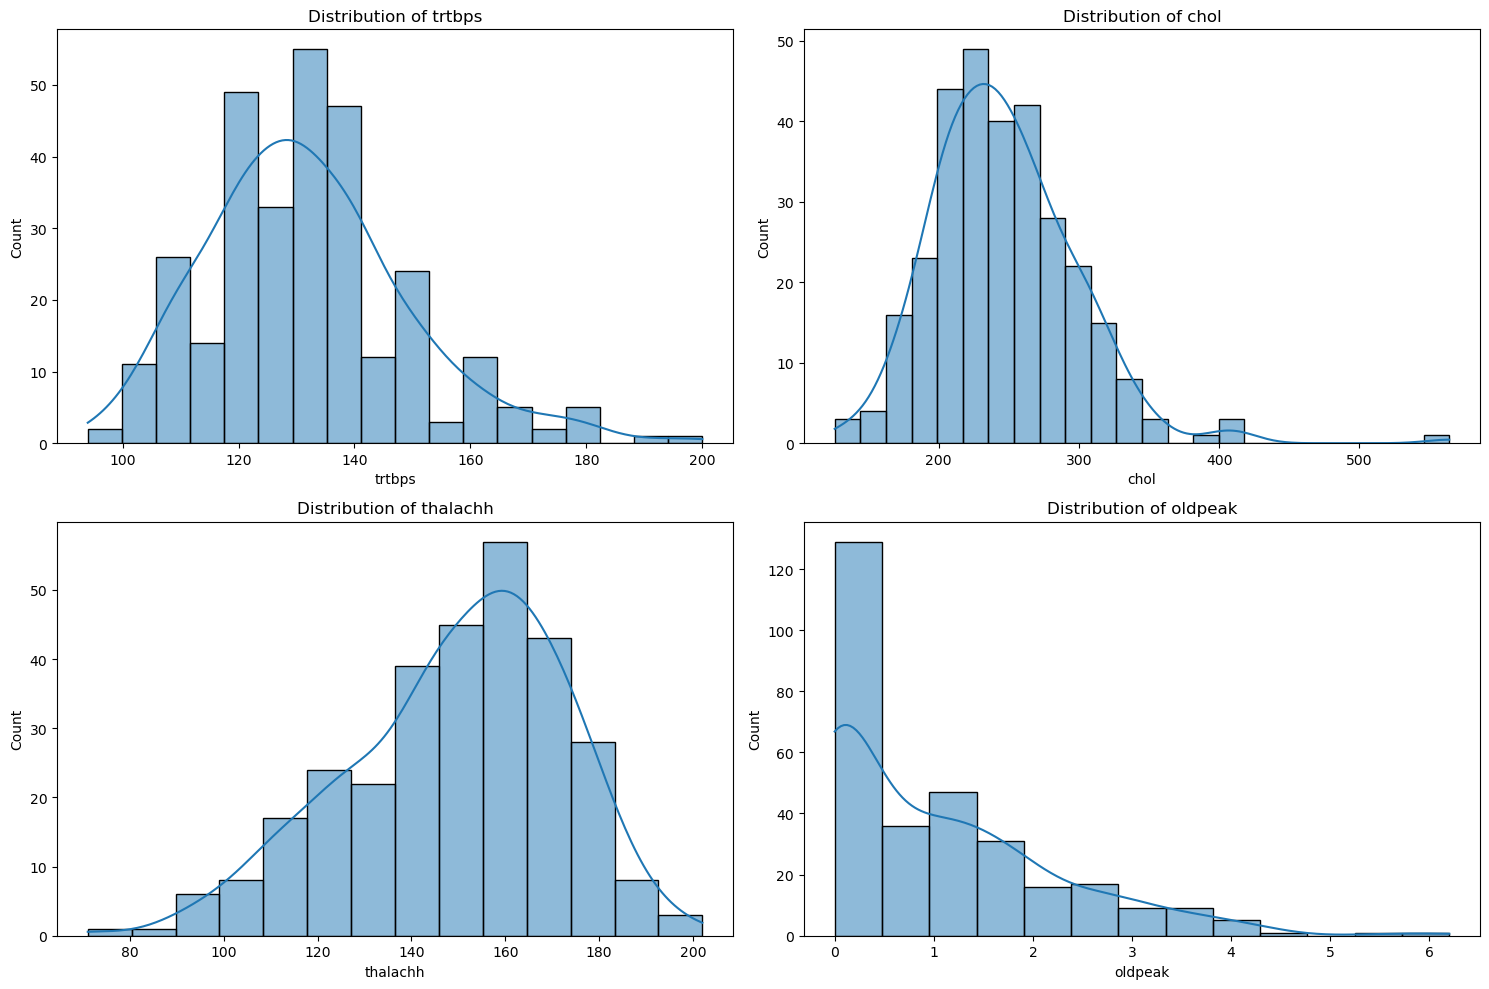

In [22]:
num_feature=['trtbps','chol','thalachh','oldpeak']

fig,axs = plt.subplots(2,2, figsize=(15,10))

for i,feature in enumerate(num_feature):
    row = i // 2  
    col = i % 2 
    sns.histplot(ax=axs[row,col],data=copy_df , x=feature  ,kde=True,palette = 'cividis')
    axs[row,col].set_title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()
    

## Insight : From the above distribution graphs we can understand that our data is not normally distributed it has some skewness 


## To remove Skewness and make our data normaly distributed we'll apply log transformation 


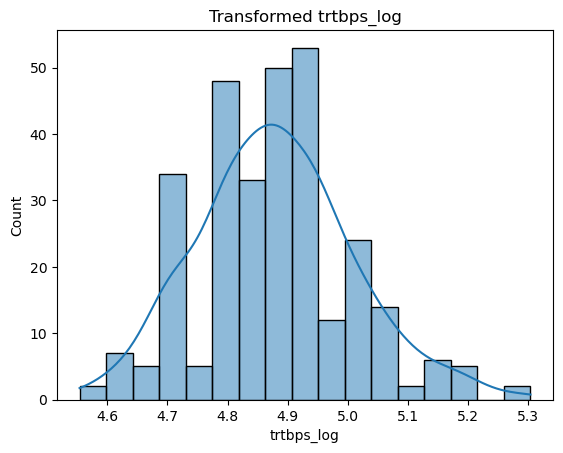

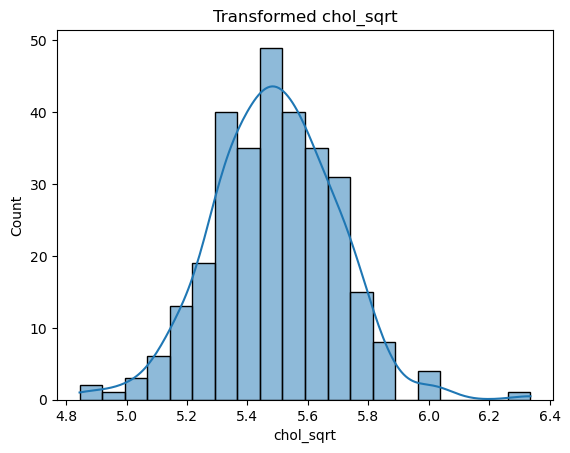

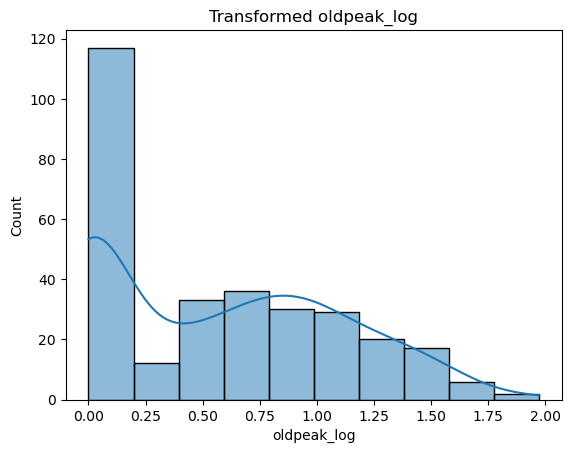

In [23]:
# Apply transformations to positively skewed features
copy_df['trtbps_log'] = np.log1p(copy_df['trtbps'])  
copy_df['chol_sqrt'] = np.log1p(copy_df['chol'])      
copy_df['oldpeak_log'] = np.log1p(copy_df['oldpeak'])  


for col in ['trtbps_log', 'chol_sqrt', 'oldpeak_log']:
    sns.histplot(copy_df[col], kde=True)
    plt.title(f'Transformed {col}')
    plt.show()

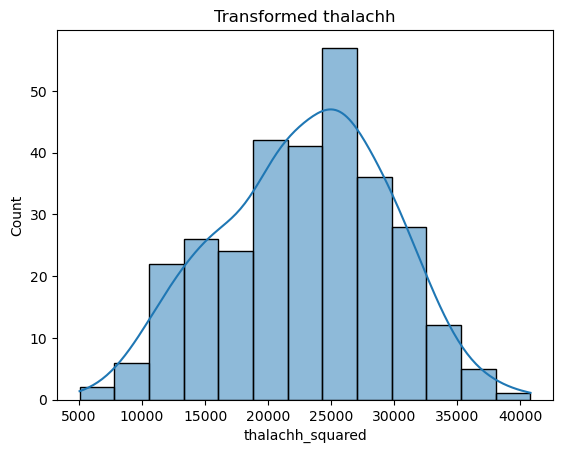

In [24]:
# Apply transformations to negatively skewed feature
copy_df['thalachh_squared'] = np.square(copy_df['thalachh'])  

sns.histplot(copy_df['thalachh_squared'], kde=True)
plt.title('Transformed thalachh')
plt.show()


In [25]:
## Checking P value of all the distribution to check either it is normally distributed or not 
from scipy.stats import shapiro

for col in ['trtbps_log', 'chol_sqrt', 'oldpeak_log', 'thalachh_squared']:
    stat, p = shapiro(copy_df[col])
    print(f'{col}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f"{col} is approximately normal.\n")
    else:
        print(f"{col} is not normal.\n")


trtbps_log: Statistics=0.9869094685759273, p=0.007714328544048164
trtbps_log is not normal.

chol_sqrt: Statistics=0.9920575370092055, p=0.10585157070747836
chol_sqrt is approximately normal.

oldpeak_log: Statistics=0.8912540740999675, p=7.15798030332277e-14
oldpeak_log is not normal.

thalachh_squared: Statistics=0.9917433181231063, p=0.09012259797332703
thalachh_squared is approximately normal.



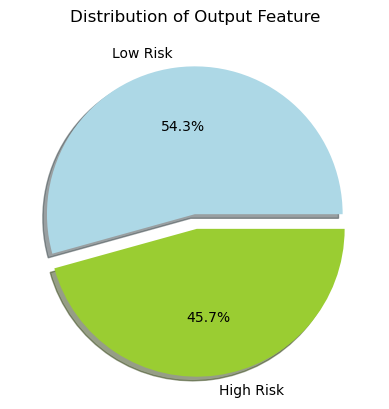

In [26]:
size = copy_df['output'].value_counts()
labels=['Low Risk','High Risk']
colors =['lightblue', 'yellowgreen']
plt.pie(size ,labels =labels , autopct='%1.1f%%',shadow=True,colors=colors , explode=[0,0.1])
plt.title("Distribution of Output Feature")
plt.show()

In [27]:
df.fbs.value_counts()

fbs
0    257
1     45
Name: count, dtype: int64

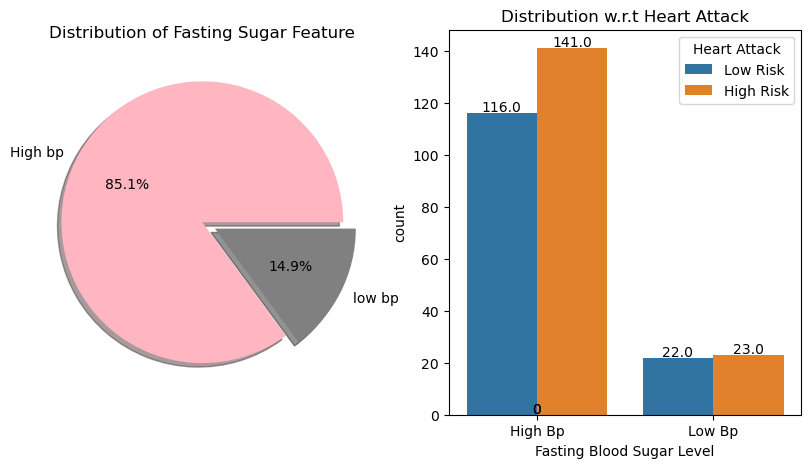

In [28]:
plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
size = copy_df['fbs'].value_counts()
labels=['High bp','low bp']
colors =['lightpink', 'grey']
plt.pie(size ,labels =labels , autopct='%1.1f%%',shadow=True,colors=colors , explode=[0,0.1])
plt.title("Distribution of Fasting Sugar Feature")



plt.subplot(122)
ticks=['High Bp' , 'Low Bp']
axis=np.arange(len(ticks))
ax=sns.countplot(data=copy_df , x='fbs',hue='output')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)
plt.xticks(axis,ticks)
plt.legend(title='Heart Attack' , labels=['Low Risk','High Risk'])
plt.title("Distribution w.r.t Heart Attack")
plt.xlabel("Fasting Blood Sugar Level")
plt.show()

In [29]:
df.exng.value_counts()

exng
0    203
1     99
Name: count, dtype: int64

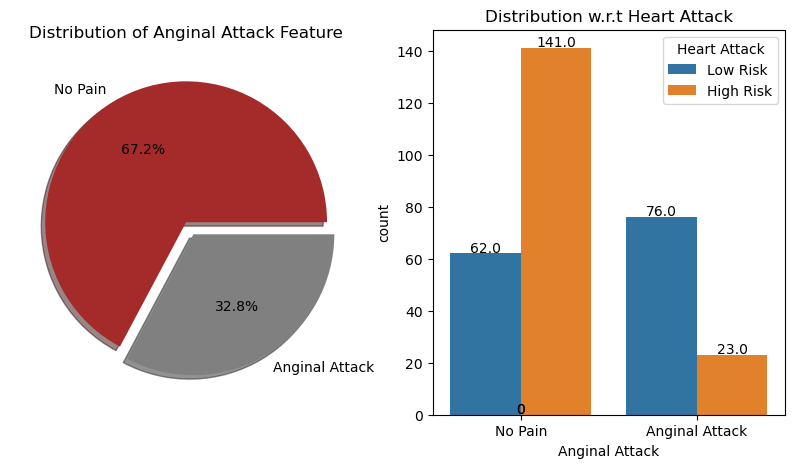

In [30]:
fig,axs=plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
size = copy_df['exng'].value_counts()
labels=['No Pain','Anginal Attack']
colors =['brown', 'grey']
plt.pie(size ,labels =labels , autopct='%1.1f%%',shadow=True,colors=colors , explode=[0,0.1])
plt.title("Distribution of Anginal Attack Feature")


plt.subplot(122)
ticks=['No Pain' , 'Anginal Attack']
axis=np.arange(len(ticks))
ax=sns.countplot(data=copy_df , x='exng',hue='output')
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2,height+2,f'{height}',ha='center',va='center',fontsize=10)
plt.xticks(axis,ticks)
plt.legend(title='Heart Attack' , labels=['Low Risk','High Risk'])
plt.title("Distribution w.r.t Heart Attack")
plt.xlabel("Anginal Attack")
plt.show()

## Preparing a Classification Model 


In [31]:
from sklearn.model_selection import train_test_split 

In [32]:
x = df.drop(columns=['output'])

In [33]:
y = df['output']


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
Scaler = StandardScaler()

In [37]:
X_train = Scaler.fit_transform(x_train)

In [38]:
X_test = Scaler.transform(x_test)


In [39]:
# importing some classifier models to check there indiviual accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


In [40]:
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score,confusion_matrix


In [41]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(n_estimators=100),
    "SVM" :SVC(kernel='linear')
}

In [42]:
results = pd.DataFrame(columns=['Model', 'Accuracy'])


In [43]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.loc[len(results)] = [model_name, accuracy]
    return results

model_results = evaluate_models(models, x_train, x_test, y_train, y_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [44]:
model_results

,Model,Accuracy
0,Logistic Regression,0.842105
1,K-Nearest Neighbors,0.684211
2,Decision Tree,0.789474
3,Random Forest,0.842105
4,AdaBoost,0.750000
5,SVM,0.855263


In [45]:
## HyperTunning our Model 
from sklearn.model_selection import GridSearchCV


In [46]:
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],  
        'penalty': ['l1', 'l2'],  
        'solver': ['liblinear']  
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],  
        'weights': ['uniform', 'distance'],  
        'p': [1, 2]  
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10, None],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4]  
    },
    "Random Forest": {
        'n_estimators': [10, 50, 100, 200],  
        'max_depth': [None, 10, 20, 30],  
        'min_samples_split': [2, 5, 10],  
        'min_samples_leaf': [1, 2, 4]  
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],   
        'learning_rate': [0.01, 0.1, 1]  
    },
    "SVM": {
        'C': [0.1, 1, 10],  
        'kernel': ['linear', 'rbf', 'poly'],  
        'gamma': ['scale', 'auto']  
    }
}

In [47]:
def hypertune_models(models, param_grids, X_train, y_train):
    results = pd.DataFrame(columns=['Model', 'Best Params', 'Best Score'])
    
    for model_name, model in models.items():
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy')
        
        grid_search.fit(X_train, y_train)
        
        results.loc[len(results)] = [model_name, grid_search.best_params_, grid_search.best_score_]
    
    return results

tuning_results = hypertune_models(models, param_grids, X_train, y_train)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\ProgramDa

In [48]:
tuning_results

,Model,Best Params,Best Score
0,Logistic Regression,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.867343
1,K-Nearest Neighbors,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}",0.832077
2,Decision Tree,"{'max_depth': 3, 'min_samples_leaf': 4, 'min_s...",0.783092
3,Random Forest,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.845217
4,AdaBoost,"{'learning_rate': 0.01, 'n_estimators': 200}",0.845411
5,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.862995


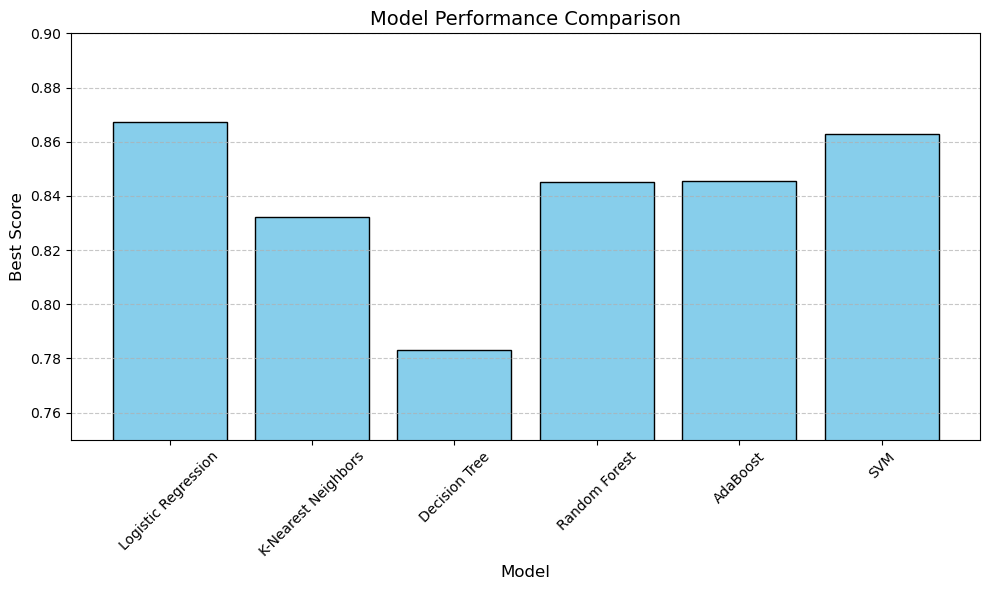

In [60]:
# Bar graph for model accuracy visualization
plt.figure(figsize=(10, 6))
plt.bar(tuning_results["Model"], tuning_results["Best Score"], color='skyblue', edgecolor='black')
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Best Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.75,0.9) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


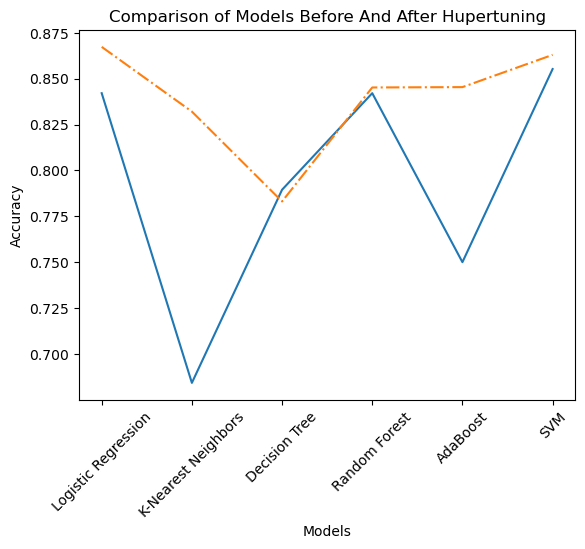

In [59]:
x=model_results['Model']

y1 =model_results['Accuracy']
y2 = tuning_results['Best Score']

plt.plot(x,y1)
plt.plot(x,y2,'-.')

plt.xlabel("Models")
plt.xticks(rotation=45)

plt.ylabel("Accuracy")
plt.title('Comparison of Models Before And After Hupertuning')
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error